<a href="https://colab.research.google.com/github/svanhemert00/lmu-isba-4790/blob/main/Cumulative_Assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cumulative Assignment 1: Machine Learning with Python
This is the INDIVIDUAL assignment for ISBA 4790- Machine Learning with Python. The assignment is due by **Tuesday February 15 at 16:00 PM**. Your submissions will be examined by [TurnItIn](https://en.wikipedia.org/wiki/Turnitin) for plaigiarism. If you use any piece of code from web or anywhere else, you should add the reference as a comment. It is fine to reuse others' (non-students) code as long as you reference them. You are not allowed to share your work or talk about this assignment with each other.

## The Business Case
A commercially successful movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

## Data Description
The dataset is from Kaggle website. You may download [the dataset here](https://drive.google.com/file/d/1lQ6VmIygkSnukT-hwFFuu3CTCiGFVhhF/view?usp=sharing). It contains 28 variables for about 5K movies, spanning across 100 years in over 60 countries. There are over 2K unique director names, and thousands of actors/actresses.

* **movie_title**	Title of the Movie
* **duration**	Duration in minutes
* **director_name**	Name of the Director of the Movie
* **director_facebook_likes**	Number of likes of the Director on his Facebook Page
* **actor_1_name**	Primary actor starring in the movie
* **actor_1_facebook_likes**	Number of likes of the Actor_1 on his/her Facebook Page
* **actor_2_name**	Other actor starring in the movie
* **actor_2_facebook_likes**	Number of likes of the Actor_2 on his/her Facebook Page
* **actor_3_name**	Other actor starring in the movie
* **actor_3_facebook_likes**	Number of likes of the Actor_3 on his/her Facebook Page
* **num_user_for_reviews**	Number of users who gave a review
* **num_critic_for_reviews**	Number of critical reviews on imdb
* **num_voted_users**	Number of people who voted for the movie
* **cast_total_facebook_likes**	Total number of facebook likes of the entire cast of the movie
* **movie_facebook_likes**	Number of Facebook likes in the movie page
* **plot_keywords**	Keywords describing the movie plot
* **facenumber_in_poster**	Number of the actor who featured in the movie poster
* **color**	Film colorization. ‘Black and White’ or ‘Color’
* **genres**	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
* **title_year**	The year in which the movie is released (1916:2016)
* **language**	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
* **country**	Country where the movie is produced
* **content_rating**	Content rating of the movie
* **aspect_ratio**	Aspect ratio the movie was made in
* **movie_imdb_link**	IMDB link of the movie
* **gross**	Gross earnings of the movie in Dollars
* **budget**	Budget of the movie in Dollars
* **imdb_score**	IMDB Score of the movie on IMDB

## Problem Steps
Please go through the following problems and produce the code that answers the problem. 
* Properly comment your code so it is easy to read and understand. 
* If you reuse any piece of code from web or anywhere else, you should add the reference/link as a comment right where you are reusing the code.
* When finished, save the notebook, and download it in .ipynb file format. You submit the notebook file on the Brightspace.

## Data Ingestion & Cleaning
1. Read the dataset into a dataframe. Use [.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) to check out the first few rows and use [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)to see a summary statistics of the dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IMDB Dataset.csv", na_values =['nan', 'NaN', 'Nan']) # include all common nulls
# df.isnull = 'NaN' -> this also sets NaN as null values

df.info() # to check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
df.head(3) # to see first 3 rows

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [4]:
df.describe() # for summary statistics

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


2. There are some duplicate rows of data. Use [.drop_duplicate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) to remove the duplicates. Make sure you print out the number of records (movies) in the dataset before and after duplicate removal.

In [5]:
len(df) # number of records before duplicate removal

5043

In [6]:
df.drop_duplicates(inplace= True) # '(inplace= True)' conserves changes

In [7]:
len(df) # number of records after duplicate removal

4998

3. Try to slice the data for a movie_title called "Avatar"; can you find that? If not, it is probably because many movie titles have some whitespaces before/after the title; they might have been generated during the data collection. Use [.str.strip()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html) to remove them whitespaces. Try again to slice the dataset for movie_title of "Avatar".

In [8]:
# MY SOLUTION:

df['movie_title'] = df.movie_title.str.strip #(to_strip=None) 
  # (1) Include '(to_strip=None)' strips whitespaces
  # (2) Make sure to include the column name after the DataFrame name because '.str.strip()' is a series method
  # (3) Store the stripped column back into the DataFrame–rassign to 'movie title'
df[df.movie_title=='Avatar'] # Slices for Avatar in movie_title

# PROFESSOR'S SOLUTION: df.loc[df.movie_title=='Avatar']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


4. Drop all the movies with title_year of less than 2000. Those are considered too old to be used for predictive purposes.

In [9]:
# MY SOLUTION: df.drop(df[df['title_year']>2000].index,inplace=True)
  # (-) Solution was taken from https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
  # (-) 'inplace=True' is needed to preserve changes

In [10]:
# PROFESSOR'S SOLUTION:
df = df.loc[df.title_year>=2000] # Just restores sliced data into df without having to use .drop()

5. Drop the movies with missing values. Print the number of movies left.

In [11]:
df.dropna(inplace=True) # '(inplace=True)' is needed to preserve changes
len(df) # prints number of movies left

2703

##Data Preparation

6. Add two new columns to the dataset; one including the profit and another the ROI (Return on Investement) for each movie. We assume only half the gross revenue goes to the producer and the other half to the movie theaters and others. So, consider profit = gross/2 - budget and ROI = (profit/budget)*100.

In [12]:
df['profit'] = df.gross/2 - df.budget

df['ROI'] = df.profit/df.budget*100

df[['profit', 'ROI']].head(1) # just to display that both columns were added correctly

,profit,ROI
0,143252923.5,60.444272


7. Add another column that calculated a new quality rating for the movies. The new rating called "imdb_quality" would be the imdb_score multiplied by the num_user_for_reviews. We susspect this may be a better predictor of movie success.


In [13]:
df['imdv_quality'] = df.imdb_score * df.num_user_for_reviews

8. Create five dummy/boolean variables as five new columns to the dataframe. The column names would be Action, Crime, Drama, Documentary, Romance. Action column should be True for any movie if 'Action' is inside its genres. That would be the case for other genre columns like Crime, Drama, etc. If you like, you can add more columns for other genres.

In [14]:
# MY SOLUTION: Wrong because it only tests records with single movie genres
  # df['Action'] = df.genres == 'Action'
  # df['Crime'] = df.genres == 'Crime'
  # df['Documentary'] = df.genres == 'Documentary'
  # df['Romance'] = df.genres == 'Romance'
  # df['Drama'] = df.genres == 'Drama'

In [15]:
# PROFESSOR'S SOLUTION:
  # (*)'Action' in df.genres -> to test a single row
  # df['Action'] = ['Action' in x for x in df.genres] -> List that iterates through each cell in DataFrame column
  # OR
  # df.genres.map(lambda x: 'Action' in x)

  # 1st BEST SOLUTION:
dummies = df.genres.str.get_dummies(sep='|')
df = pd.concat([df, dummies], axis = 1)

  # 2nd BEST SOLUTION: with For loop
    # for i in ['Action', 'Crime', 'Drama', 'Documentary', 'Romance']:
    #   df[i] = df.genres.str.contains(i)

  # 3rd BEST SOLUTION:
    # df['Action'] = df.genres.str.contains('Action')
    # df['Crime'] = df.genres.str.contains('Crime')
    # df['Drama'] = df.genres.str.contains('Drama')
    # df['Documentary'] = df.genres.str.contains('Documentary')
    # df['Romance'] = df.genres.str.contains('Romance')

9. Create a new boolean column  called "profitable" that specifies if the movie was profitable. We consider any movie as profitable if it has an ROI of 10 percent and over. In other words, the column should be True if the movie's ROI is equal or more than 10, and it should be False otherwise.

In [16]:
PROFITABLE_PERCENTAGE = 10
df['profitable'] = df.ROI >= PROFITABLE_PERCENTAGE

10. Use One-Hot encoding to convert the content_rating variable to dummy variables, so we can feed it to ML algorithms. Drop the "NC-17" and "Unrated" and "Not Rated" dummy columns, because there are not many movies with those ratings.

In [17]:
# MY SOLUTION:
  # df.drop(df[df['content_rating']=='NC-17'].index,inplace=True)
  # df.drop(df[df['content_rating']=='Unrated'].index,inplace=True)
  # df.drop(df[df['content_rating']=='Not Rated'].index,inplace=True)

  # df1 = pd.get_dummies(df, prefix='', prefix_sep='', columns=['content_rating'])

In [18]:
# PROFESSOR'S SOLUTION: 
  # ()
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['content_rating'])

##Data Exploration & Visualization


11. Use [.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr) function to calculate the pairwise correlation between all variables. Slice the correlation dataframe to see only the profitable column. Sort the column descendingly, so we can see which variables correlate the most with profittable.

In [19]:
crl = df.corr() # Correlation numbers are determined good-bad based on context
crl = crl.profitable.sort_values(ascending= False)

12. Who are the most 10 profitable directors in the industry in terms of the highest average ROI? **Hint:** groupby your data based on the director name and use a mean function to aggregate their ROI. The use [.nlargets()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html#pandas.DataFrame.nlargest) function to receive the top 10 or so of the directors. Visualize the result using a line plot. Properly title the plot and label the axes. Rotate the axes labels, if needed, to make sure the director names are properly shown.

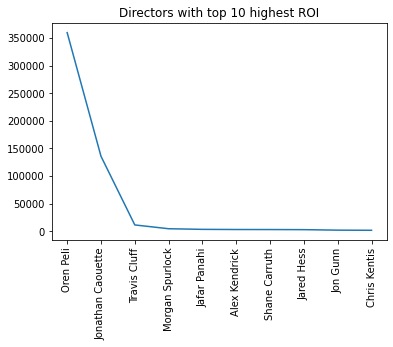

In [20]:
director_roi = df.groupby('director_name').ROI.mean().nlargest(10)

plt.plot(director_roi)
plt.xticks(rotation=90)
plt.title('Directors with top 10 highest ROI')
plt.show()

13. create a [line plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) that displays two lines: a green dashed line for average gross earning over the years, and a red dotted line for average budget over the years. Add proper legend for the plot. Properly title the plot and label the axes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


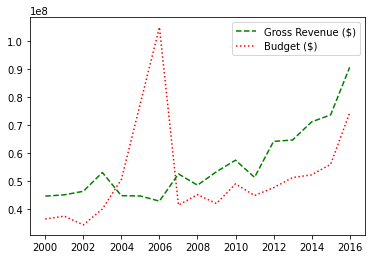

In [21]:
summ_df = df.groupby('title_year')['gross', 'budget'].mean()

# Create line plot:
plt.plot(summ_df.gross, color='g', linestyle='--', label='Gross Revenue ($)') # One row at a time
plt.plot(summ_df.budget, color='r', linestyle='dotted', label='Budget ($)') # One row at a time
plt.legend(loc='upper right')
plt.show()

14. Calculate the average imdb_score and average ROI for movies made by each director. Then create a [scatter plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) that displays the two for all directors. Properly size the markers and title the plot and label the axes. Rotate the axes labels if needed.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


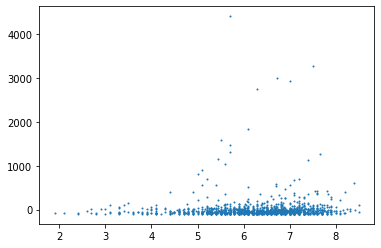

In [22]:
df = df.loc[df.ROI<10000] # removing outliers

# Group By:
director_summ = df.groupby('director_name')['ROI', 'imdb_score'].mean()

# Create scatterplot:
plt.scatter(director_summ.imdb_score, director_summ.ROI, s=1)
plt.show()

##Modeling

15. Use [.select_dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to drop the non-numerical (object) variables from the dataset (Boolean variables are considered numerical in Python, and can be used in models). Create a decision tree model to predict the "profitable" variable. Make sure to drop the 'profitable','roi','gross','profit' variables from the predictive dataset (X) because they are we calculated 'profitable' from them. Use train and test datasets and compare their accuracy to make sure you are not over-fitting. Tune the model to get the most accurate model you can.

    Print the train and test accuracy rate, and plot the tree for your best model.

Model accuracy score for Training set: 0.8175925925925925
Model accuracy score for Training set: 0.8314814814814815
              precision    recall  f1-score   support

       False       0.85      0.96      0.90       428
        True       0.70      0.33      0.45       112

    accuracy                           0.83       540
   macro avg       0.77      0.65      0.67       540
weighted avg       0.82      0.83      0.81       540



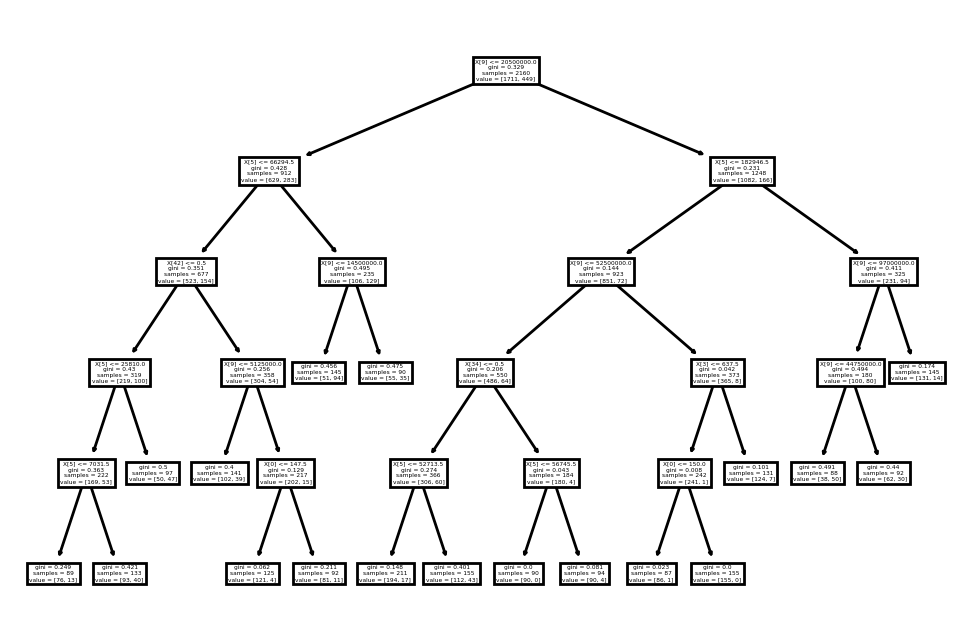

In [23]:
df = df.select_dtypes(exclude='object')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

X = df.drop(['profitable', 'ROI', 'gross', 'profit'], axis=1)
y = df.profitable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # Always X first, then y
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.04)

dtc.fit(X_train, y_train)

acc_tr = accuracy_score(y_train, dtc.predict(X_train))
print('Model accuracy score for Training set:', acc_tr)

acc_ts = accuracy_score(y_test, dtc.predict(X_test))
print('Model accuracy score for Training set:', acc_ts)

print(classification_report(y_test, dtc.predict(X_test)))

plt.figure(dpi=200)
plot_tree(dtc)
plt.show()

In [24]:
X.iloc[:,9]

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
5       263700000.0
           ...     
5012     35000000.0
5026         4500.0
5027        10000.0
5033         7000.0
5042         1100.0
Name: budget, Length: 2700, dtype: float64

16. Create Random Forest model to predict the 'profitable' variable, like the previous question. You can use the same X and y datasets. Tune your model to get the best accuracy rate over the train and test datasets. Print the accuracy rates for your best model. 

Model accuracy score for Training set: 0.7921296296296296
Model accuracy score for Training set: 0.7925925925925926
              precision    recall  f1-score   support

       False       0.79      1.00      0.88       428
        True       0.00      0.00      0.00       112

    accuracy                           0.79       540
   macro avg       0.40      0.50      0.44       540
weighted avg       0.63      0.79      0.70       540



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


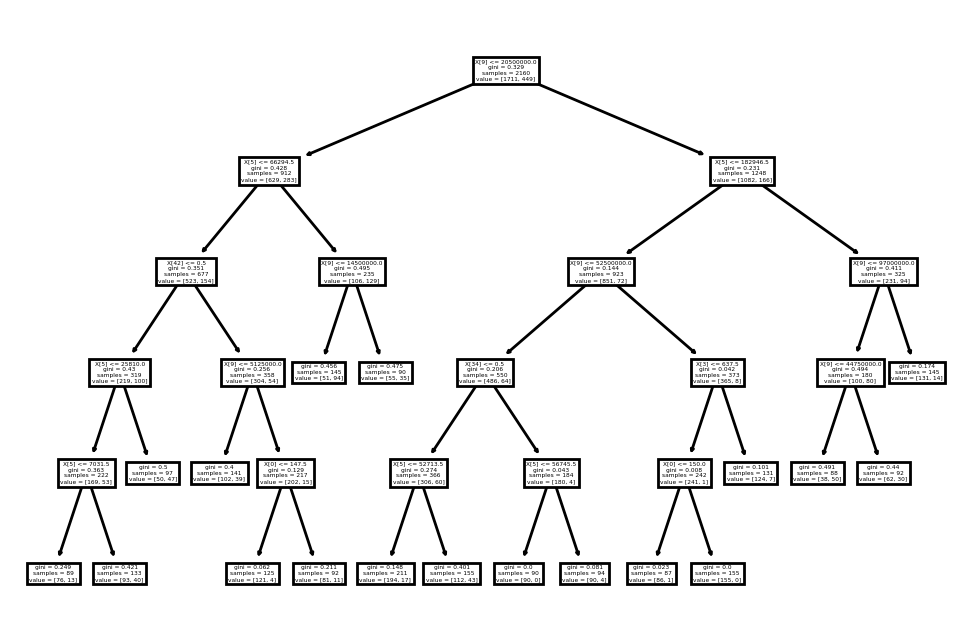

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=9,
                             min_samples_leaf=.03)

rfc.fit(X_train, y_train)

acc_rfc_train = accuracy_score(y_train, rfc.predict(X_train))
print('Model accuracy score for Training set:', acc_rfc_train)

acc_rfc_test = accuracy_score(y_test, rfc.predict(X_test))
print('Model accuracy score for Training set:', acc_rfc_test)

print(classification_report(y_test, rfc.predict(X_test)))

plt.figure(dpi=200)
plot_tree(dtc)
plt.show()

17. Create a linear and a ridge regression model to predict "roi" variable. Make sure to drop the 'profitable', 'roi', 'gross', 'profit' variables from the predictive dataset (X) because they are closely claculated in relation to 'roi'. Use train and test datasets and compare their accuracy (error rate). Plot the coefficients to see which variables contribute most to movies' ROI. Which of the simple linear and ridge regressions work better?

    **Note:** You need to normalize your X dataset before you create regression models.

In [26]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.

